<a href="https://colab.research.google.com/github/LikhitKrishna2003/Hello-World/blob/main/Web_Scraping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.9 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
reviews

["✅ Trip Verified |  London to Seoul. I normally fly business but this was a last minute flight and the cost of Club was prohibitive and so I thought I would give World Traveller Plus a go. The cabin is stylish and intimate and I was surprised how roomy and comfortable the seats were. The entertainment system was working well (although the adverts before every single showing are very annoying). I was happy with the headphones and small amenity kit and felt the staff were very welcoming. My only complaint was the slightly pointless menu we were given as for lunch neither of the meals listed were actually available. A similar thing happened with breakfast, three options, the third being the most appetizing, and no, it hadn't been loaded, so this is an area BA might want to look into. All in all the service was good and worth the price. For ground service BA, please at least keep a couple of desks for people to check into before automation puts us all out of work.",
 '✅ Trip Verified |  L

In [ ]:
df = pd.DataFrame(np.array(reviews), columns=['Reviews'] )

In [ ]:
df.tail

<bound method NDFrame.tail of                                                Reviews
0    ✅ Trip Verified | Absolutely horrible airline....
1    ✅ Trip Verified |  Having experienced delays a...
2    ✅ Trip Verified | Travelled to Heathrow to Kal...
3    Not Verified |  This flight failed at every le...
4    Not Verified |  Beware of British Airways and ...
..                                                 ...
995  ✅ Trip Verified |  London to Paris. I wish tha...
996  ✅ Trip Verified |  Delivering outstanding cust...
997  ✅ Trip Verified | This was a night flight New ...
998  ✅ Trip Verified |  Amman to London. Appalling ...
999  ✅ Trip Verified |  Paphos to London Gatwick in...

[1000 rows x 1 columns]>

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
def sentiment_analyser(reviews):
  tokens = tokenizer.encode(reviews, return_tensors='pt')
  result = model(tokens)
  return int(torch.argmax(result.logits))+1

In [ ]:
df['Sentiment'] = df['Reviews'].apply(lambda x: sentiment_analyser (x[:512]))

In [ ]:
df

,Reviews,Sentiment
0,✅ Trip Verified | London to Seoul. I normally...,4
1,✅ Trip Verified | London Heathrow to New York...,3
2,✅ Trip Verified | San Diego to London. From th...,1
3,✅ Trip Verified | Gatwick to St Lucia. Flew B...,5
4,✅ Trip Verified | London to Chennai. It was a...,5
...,...,...
1095,✅ Verified Review | London Heathrow to Kuala ...,1
1096,Travelling with British Airways is always a go...,4
1097,I cannot believe that British Airways have suc...,2
1098,Seattle to Prague via London Heathrow with Bri...,1


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.isnull().sum()

Reviews      0
Sentiment    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

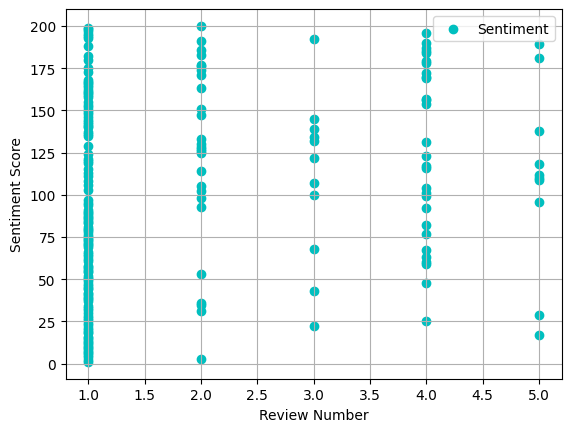

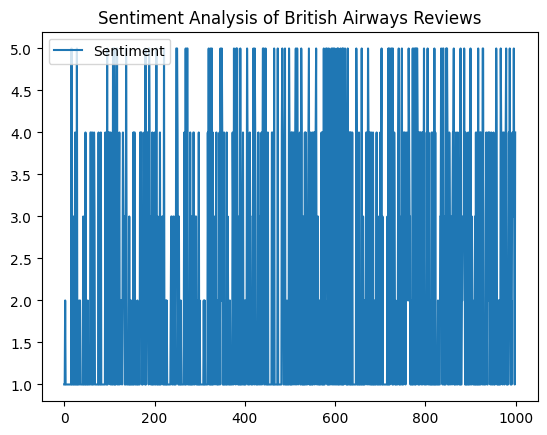

In [ ]:
plt.scatter(df.Sentiment[:200], range(1,201), label='Sentiment', color = 'c')
plt.xlabel('Review Number')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
df.plot()
plt.title('Sentiment Analysis of British Airways Reviews')
plt.show

In [ ]:
df1 = df.Sentiment == 1
df2 = df.Sentiment == 2
df3 = df.Sentiment == 3
df4 = df.Sentiment == 4
df5 = df.Sentiment == 5
Sent = [df1.sum(), df2.sum(), df3.sum(), df4.sum(), df5.sum()]
my_labels = ["Score=1", "Score=2", "Score=3", "Score=4", "Score=5"]

([<matplotlib.patches.Wedge at 0x7a65822d28f0>,
 [Text(-1.0847871651457701, -0.18230964410859843, 'Score=1'),
  Text(0.7274429081644703, -0.8251223032746227, 'Score=2'),
  Text(1.0778405195306868, -0.2196811654598985, 'Score=3'),
  Text(0.9572022239145352, 0.5419999100858488, 'Score=4'),
  Text(0.3234445506912272, 1.0513722569233745, 'Score=5')],
 [Text(-0.5917020900795109, -0.0994416240592355, '55.3%'),
  Text(0.39678704081698374, -0.45006671087706684, '12.4%'),
  Text(0.5879130106531019, -0.1198260902508537, '8.2%'),
  Text(0.5221103039533829, 0.2956363145922811, '14.6%'),
  Text(0.176424300377033, 0.5734757765036588, '9.5%')])

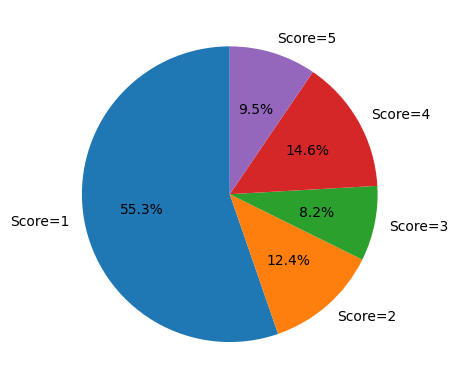

In [ ]:
plt.pie(Sent, labels = my_labels, startangle=90, autopct='%1.1f%%')